# **Nombre: Mateo Orozco Baldovino**

In [49]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv"
df = pd.read_csv(url, sep=',')
print(df.head())


   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


In [50]:
# Revisa tipos de datos
print(df.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [51]:
# Convertir content_rating a binario
df['content_rating'] = df['content_rating'].apply(lambda x: 1 if x == 'R' else 0)
print(df.head())

   star_rating                     title  content_rating   genre  duration  \
0          9.3  The Shawshank Redemption               1   Crime       142   
1          9.2             The Godfather               1   Crime       175   
2          9.1    The Godfather: Part II               1   Crime       200   
3          9.0           The Dark Knight               0  Action       152   
4          8.9              Pulp Fiction               1   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


In [52]:
# Cambia los nombres de las variables seleccionadas
variable_cuantitativa = input("Variable cuantitativa para estimar la media: ")
variable_binaria = input("Variable binaria para estimar proporciones (0 y 1): ")

Variable cuantitativa para estimar la media: star_rating
Variable binaria para estimar proporciones (0 y 1): content_rating


In [53]:
import numpy as np

n = 100
media_poblacional = df[variable_cuantitativa].mean()
media_muestral = df.sample(n=n, replace=False)[variable_cuantitativa].mean()

print(f"Media poblacional: {media_poblacional:.2f}")
print(f"Media muestral (n={n}): {media_muestral:.2f}")

Media poblacional: 7.89
Media muestral (n=100): 7.88


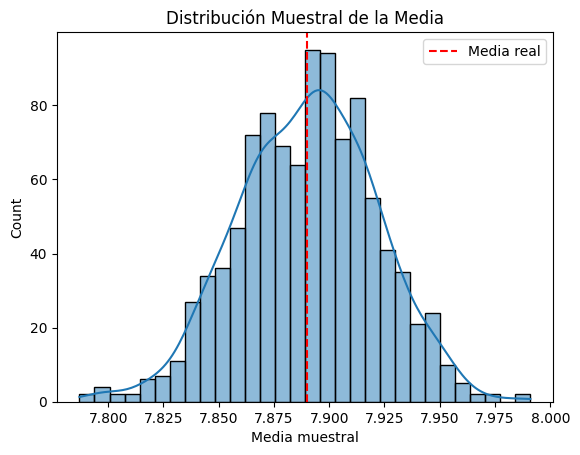

In [54]:
medias = []
for i in range(1000):
    muestra = df.sample(n=n, replace=False)
    medias.append(muestra[variable_cuantitativa].mean())

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(medias, bins=30, kde=True)
plt.axvline(media_poblacional, color='red', linestyle='--', label='Media real')
plt.title("Distribución Muestral de la Media")
plt.xlabel("Media muestral")
plt.legend()
plt.show()

In [55]:
proporcion_real = df[variable_binaria].mean()
proporcion_muestral = df.sample(n=n, replace=False)[variable_binaria].mean()

print(f"Proporción real: {proporcion_real:.3f}")
print(f"Proporción muestral (n={n}): {proporcion_muestral:.3f}")

Proporción real: 0.470
Proporción muestral (n=100): 0.510


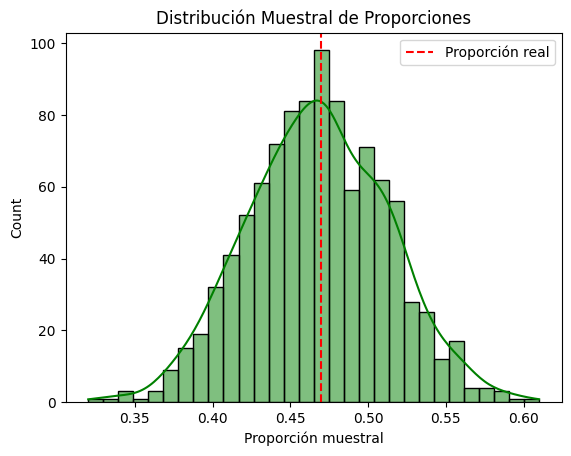

In [56]:
proporciones = []
for i in range(1000):
    muestra = df.sample(n=n, replace=False)
    proporciones.append(muestra[variable_binaria].mean())

sns.histplot(proporciones, bins=30, kde=True, color='green')
plt.axvline(proporcion_real, color='red', linestyle='--', label='Proporción real')
plt.title("Distribución Muestral de Proporciones")
plt.xlabel("Proporción muestral")
plt.legend()
plt.show()

 Preguntas para responder:

* ¿Qué tan cercanas estuvieron las estimaciones muestrales a los valores reales?
* ¿Cómo se comportaron las distribuciones muestrales? ¿Evidencian el Teorema Central del Límite?
* ¿Qué ventajas observas del MAS? ¿Qué limitaciones?
* ¿Cómo cambiarían los resultados si aumentas el tamaño muestral a 300?
* ¿Qué variable elegirías diferente si repitieras esta actividad con otro dataset?




**¿Qué tan cercanas estuvieron las estimaciones muestrales a los valores reales?**

La estimación de la media muestral para star_rating (7.88) estuvo notablemente cercana a la media poblacional real (7.89), con una diferencia mínima de solo 0.01; por otro lado, la proporción muestral para content_rating (0.510) también se mantuvo razonablemente próxima a la proporción real de la población (0.470), mostrando una diferencia de 0.040, lo que en ambos casos sugiere que las muestras tomadas fueron buenas aproximaciones de sus respectivos parámetros poblacionales en esta instancia particular.

**¿Cómo se comportaron las distribuciones muestrales? ¿Evidencian el Teorema Central del Límite?**

Ambas distribuciones muestrales, tanto la de la media como la de la proporción, exhibieron un comportamiento que claramente evidencia el Teorema Central del Límite, al adoptar una forma aproximadamente de campana o normal y centrarse consistentemente alrededor de sus respectivos valores poblacionales reales, lo cual es visible por la alineación de las líneas rojas (media real y proporción real) con el pico de sus histogramas.

**¿Qué ventajas observas del MAS? ¿Qué limitaciones?**

Las principales ventajas del Muestreo Aleatorio Simple (MAS) radican en su imparcialidad y la alta probabilidad de obtener muestras representativas de la población, lo que facilita inferencias estadísticas válidas al eliminar el sesgo del investigador; sin embargo, sus limitaciones incluyen la necesidad de disponer de una lista completa de la población, lo cual es a menudo inviable para poblaciones grandes, así como posibles ineficiencias en la recolección de datos si la población está geográficamente dispersa o si se requiere una representación garantizada de subgrupos pequeños.

**¿Cómo cambiarían los resultados si aumentas el tamaño muestral a 300?**

Si se aumentara el tamaño muestral a 300, los resultados mostrarían una mejora en la precisión: las distribuciones muestrales se volverían más estrechas y altas (es decir, tendrían una menor varianza y un error estándar reducido), lo que significa que las medias y proporciones obtenidas de las muestras individuales tendrían una probabilidad mucho mayor de estar más cerca de los valores poblacionales reales, y la forma de las distribuciones se aproximaría aún más a una curva normal perfecta.

**¿Qué variable elegirías diferente si repitieras esta actividad con otro dataset?**

Si repitiera esta actividad con otro dataset, para la variable cuantitativa elegiría cualquier columna numérica que representara una magnitud medible de interés, como la edad o el precio, evitando identificadores; mientras que para la variable binaria, seleccionaría una columna que naturalmente solo presente dos estados, como "sí/no" o "verdadero/falso", o en su defecto, binarizaría una variable categórica de múltiples opciones para ajustarla a un formato de dos categorías, siempre basando la elección en la relevancia para el objetivo del análisis.